In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

SyntaxError: invalid syntax (numpy.py, line 1)

In [ ]:
connection = mysql.connector.connect(
    user='root',
    password='ashwani@1234',
    host='localhost',
    database='Ecomerce_data_analysis' 
)

In [ ]:
cursor = connection.cursor()


In [ ]:
cursor.execute('SELECT * FROM customer')
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [ ]:
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [ ]:
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [ ]:
print("Customer Data:")
customer_data.head()

Customer Data:


,customer_id,name,city,email,phone_no,address,pin_code
0,01b3,Jessica Pace,New York,howelldonna@example.net,9195544710,"0871 Sherri Point Lake Frank, WY 93019",7603
1,06e2,Deborah Pierce,Los Angeles,morganbrooke@example.org,(742)565-9589x1,"017 Christine Stravenue Knappside, SC 15982",41813
2,0829,Jill Park,San Antonio,xspencer@example.org,591.763.3253,"824 Robinson Expressway Port Scotttown, DC 77081",80798
3,0a7a,Amanda Reeves,Los Angeles,stacieford@example.org,+1-747-833-9017,"575 Joseph Key South Samantha, AZ 76007",58430
4,0cf4,Michael Patel,Phoenix,jacob59@example.com,(711)991-0518,"6394 Robert Burgs Apt. 698 Port Mercedeston, P...",44488


In [ ]:
print("\nProduct Data:")
product_data.head()


Product Data:


,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,01701f7,Wireless Mouse,Toys,Puzzles,376.97,185.35,41
1,0883331,Webcam,Home & Kitchen,Furniture,16.38,281.24,12
2,0fd0c33,Keyboard,Books,Fiction,21.32,459.13,100
3,14fc883,Wireless Mouse,Books,Fiction,14.35,38.26,22
4,1afab41,Webcam,Home & Kitchen,Kitchen Appliances,191.39,383.07,3


In [ ]:
print("\nOrder Data:")
order_data.head()


Order Data:


,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,1,7891,2bd1b5a,5.0,384.20,Cash,2024-03-09 10:40:13,Delivered
1,2,e8cf,1afab41,1.0,383.07,PayPal,2024-02-09 11:44:49,Canceled
2,3,d6af,c2336ac,3.0,1363.35,Debit Card,2024-01-10 19:26:55,Pending
3,4,3f2f,83e7d42,1.0,326.42,Debit Card,2024-07-24 04:09:43,Pending
4,5,2b0b,837ca71,3.0,1424.19,Debit Card,2024-04-23 10:32:32,Canceled


In [ ]:
print("\nMissing Values:")
print(customer_data.isna().sum())
print(product_data.isna().sum())
print(order_data.isna().sum())



Missing Values:
customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64
product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64
order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64


In [ ]:
print("\nData Types:")
print(customer_data.dtypes)
print(product_data.dtypes)
print(order_data.dtypes)


Data Types:
customer_id    object
name           object
city           object
email          object
phone_no       object
address        object
pin_code        int64
dtype: object
product_id         object
product_name       object
category           object
sub_category       object
original_price    float64
selling_price     float64
stock               int64
dtype: object
order_id                 int64
customer_id             object
product_id              object
quantity               float64
total_price            float64
payment_mode            object
order_date      datetime64[ns]
order_status            object
dtype: object


In [ ]:
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
Q1 = order_data['quantity'].quantile(0.25)
Q3 = order_data['quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


City-wise Customer Count:
city
Chicago          8
Dallas          12
Houston         12
Los Angeles      8
New York        13
Philadelphia    10
Phoenix         10
San Antonio     11
San Diego        6
San Jose        10
Name: customer_id, dtype: int64


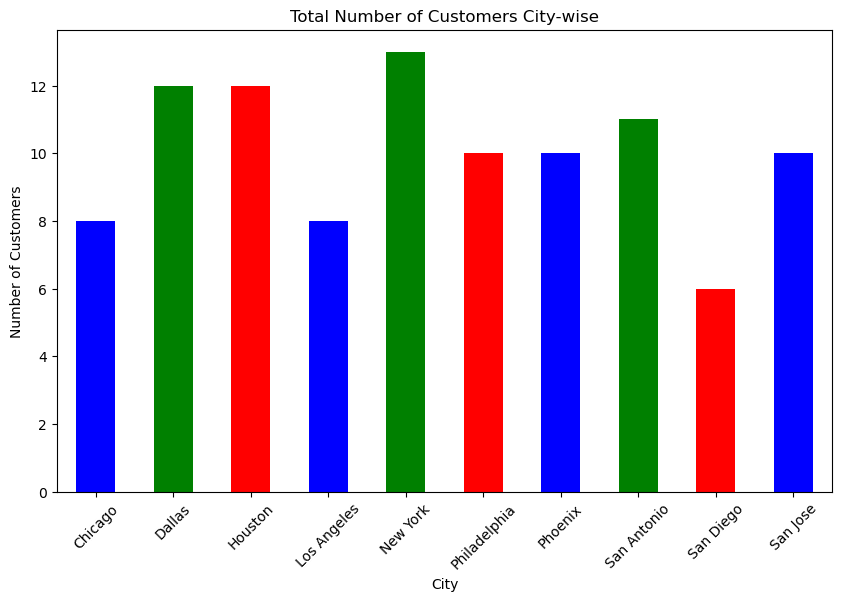

In [ ]:
cleaned_order_data = order_data[(order_data['quantity'] >= lower_bound) & (order_data['quantity'] <= upper_bound)]
if 'city' in customer_data.columns:
    city_wise_customers = customer_data.groupby('city')['customer_id'].count()
    print("\nCity-wise Customer Count:")
    print(city_wise_customers)
    city_wise_customers.plot(kind='bar', figsize=(10, 6), color=['blue','green','red'])

    plt.title('Total Number of Customers City-wise')
    plt.xlabel('City')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("The 'city' column is not present in the customer data.")


Most Frequent Customers:
customer_id
9a0c    9
3b7a    6
4389    5
33cc    5
8dfc    5
0cf4    5
3f2f    4
d304    4
a462    4
e8cf    4
Name: order_id, dtype: int64


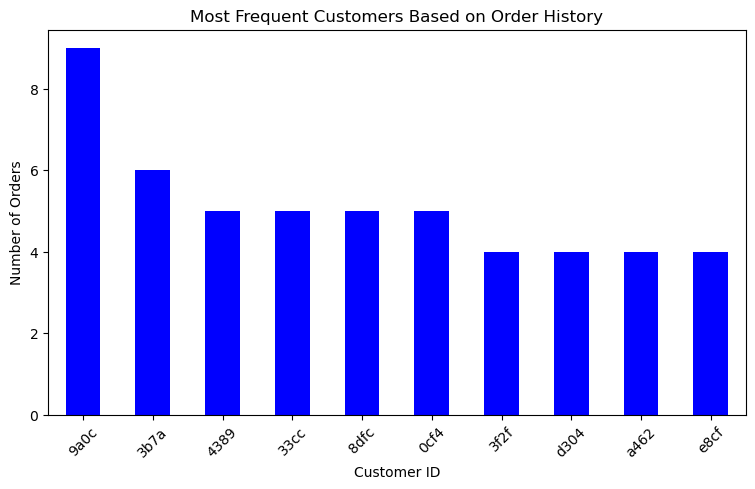

In [ ]:
customer_order_counts = order_data.groupby('customer_id')['order_id'].count()
most_frequent_customers = customer_order_counts.sort_values(ascending=False).head(10)
print("\nMost Frequent Customers:")
print(most_frequent_customers)
most_frequent_customers.plot(kind='bar', figsize=(9, 5), color='blue')

plt.title('Most Frequent Customers Based on Order History')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


Total Number of Products by Category:
category
Books             10
Clothing           9
Electronics       11
Home & Kitchen     9
Toys              11
Name: product_id, dtype: int64


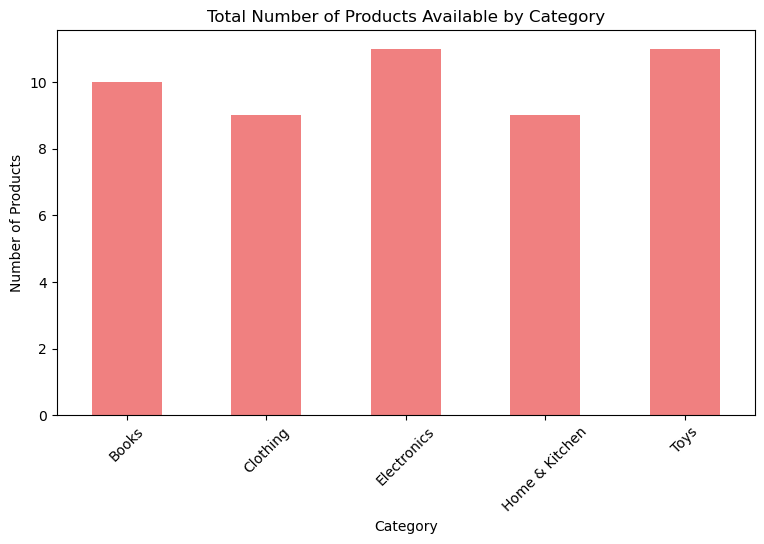

In [ ]:
products_per_category = product_data.groupby('category')['product_id'].count()
print("\nTotal Number of Products by Category:")
print(products_per_category)
products_per_category.plot(kind='bar', figsize=(9, 5), color='lightcoral')

plt.title('Total Number of Products Available by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


Total Number of Products by Sub-Category:
sub_category
Action Figures        3
Board Games           6
Cameras               4
Computers             4
Decor                 2
Educational           3
Fiction               2
Furniture             2
Kids                  5
Kitchen Appliances    5
Men                   3
Mobile Phones         3
Non-Fiction           5
Puzzles               2
Women                 1
Name: product_id, dtype: int64


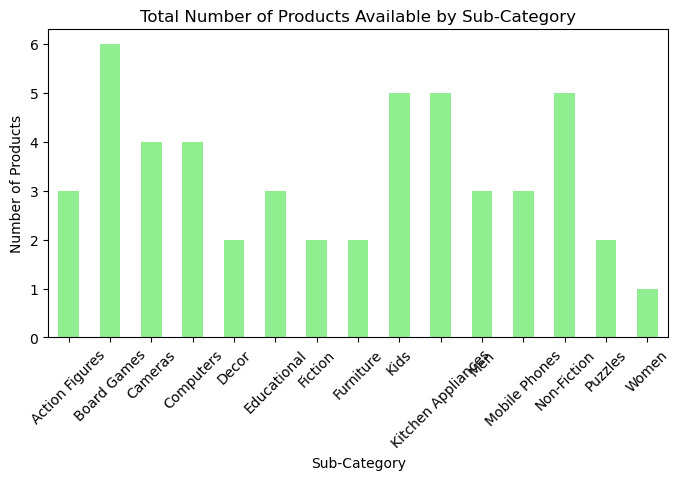

In [ ]:
products_per_subcategory = product_data.groupby('sub_category')['product_id'].count()
print("\nTotal Number of Products by Sub-Category:")
print(products_per_subcategory)

products_per_subcategory.plot(kind='bar', figsize=(8,4), color='lightgreen')
plt.title('Total Number of Products Available by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


Total Number of Products by Sub-Category:
sub_category
Action Figures        3
Board Games           6
Cameras               4
Computers             4
Decor                 2
Educational           3
Fiction               2
Furniture             2
Kids                  5
Kitchen Appliances    5
Men                   3
Mobile Phones         3
Non-Fiction           5
Puzzles               2
Women                 1
Name: product_id, dtype: int64


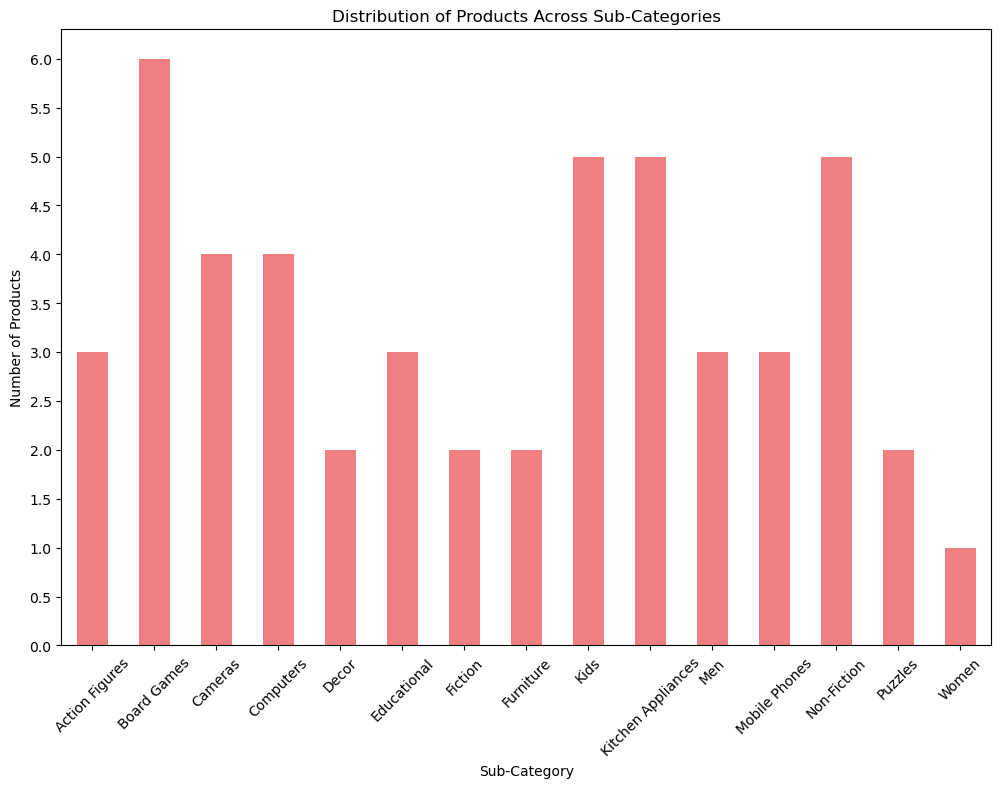

In [ ]:
products_per_subcategory = product_data.groupby('sub_category')['product_id'].count()
print("\nTotal Number of Products by Sub-Category:")
print(products_per_subcategory)
products_per_subcategory.plot(kind='bar', figsize=(12, 8), color='lightcoral')
plt.title('Distribution of Products Across Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
max_count = products_per_subcategory.max()
plt.yticks(np.arange(0, max_count + 0.5, 0.5))
plt.show()

In [ ]:
low_stock_threshold = product_data['stock']
low_stock_products = product_data[product_data['stock'] < low_stock_threshold]
print("Products with Low Stock Levels:")
print(low_stock_products)
if not low_stock_products.empty:
    low_stock_products.plot(kind='bar', x='product_id', y=low_stock_threshold, figsize=(12, 6), color='orange')
    plt.title('Products with Low Stock Levels')
    plt.xlabel('Product Name')
    plt.ylabel('Stock Level')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No products with low stock levels.")


Products with Low Stock Levels:
Empty DataFrame
Columns: [product_id, product_name, category, sub_category, original_price, selling_price, stock]
Index: []
No products with low stock levels.


In [ ]:
average_selling_price = product_data['selling_price'].mean()
maximum_selling_price = product_data['selling_price'].max()
minimum_selling_price = product_data['selling_price'].min()
print(f"Average Selling Price: {average_selling_price:.2f}")
print(f"Maximum Selling Price: {maximum_selling_price:.2f}")
print(f"Minimum Selling Price: {minimum_selling_price:.2f}")


Average Selling Price: 226.42
Maximum Selling Price: 474.73
Minimum Selling Price: 5.31


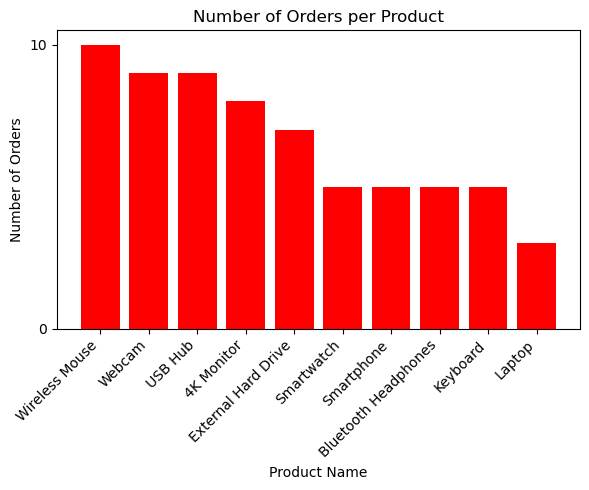

In [ ]:

product_order_count = order_data.groupby('product_id').size()

product_order_count = product_order_count.reset_index(name='order_count')
product_order_count = pd.merge(product_order_count, product_data[['product_id', 'product_name']], on='product_id')

product_order_count = product_order_count.sort_values(by='order_count', ascending=False)

plt.figure(figsize=(6, 5))
plt.bar(product_order_count['product_name'], product_order_count['order_count'], color='red')

plt.title('Number of Orders per Product')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, product_order_count['order_count'].max() + 10, 10)) 
plt.tight_layout()
plt.show()


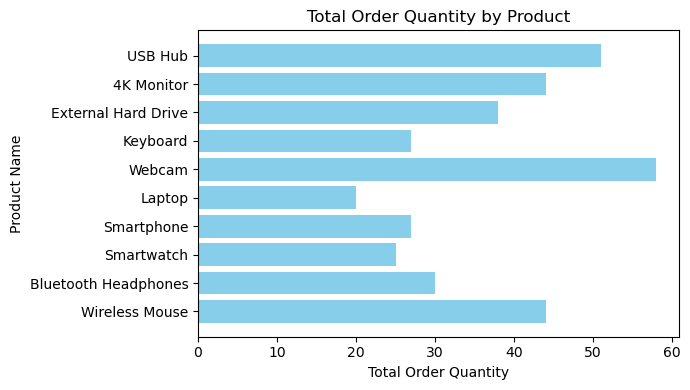

In [ ]:
total_quantity_by_product = order_data.groupby('product_id')['quantity'].sum()
product_quantity_data = total_quantity_by_product.reset_index().merge(product_data[['product_id', 'product_name']], on='product_id')
product_quantity_data = product_quantity_data.sort_values('quantity', ascending=True)
plt.figure(figsize=(7, 4))
plt.barh(product_quantity_data['product_name'], product_quantity_data['quantity'], color='skyblue')
plt.title('Total Order Quantity by Product')
plt.xlabel('Total Order Quantity')
plt.ylabel('Product Name')
plt.xticks(range(0, int(product_quantity_data['quantity'].max()) + 10, 10))  # X-axis ticks as multiples of 10
plt.tight_layout()
plt.show()


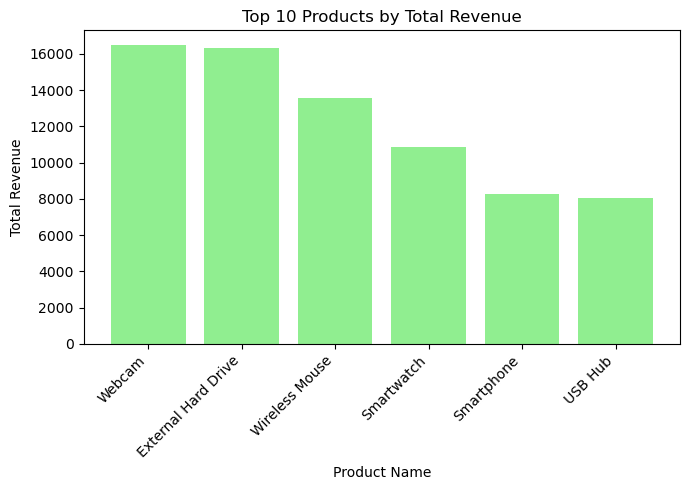

In [ ]:
total_revenue_by_product = order_data.groupby('product_id')['total_price'].sum()
product_revenue_data = total_revenue_by_product.reset_index().merge(product_data[['product_id', 'product_name']], on='product_id')
top_10_products = product_revenue_data.sort_values('total_price', ascending=False).head(10)
plt.figure(figsize=(7,5))
plt.bar(top_10_products['product_name'], top_10_products['total_price'], color='lightgreen')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


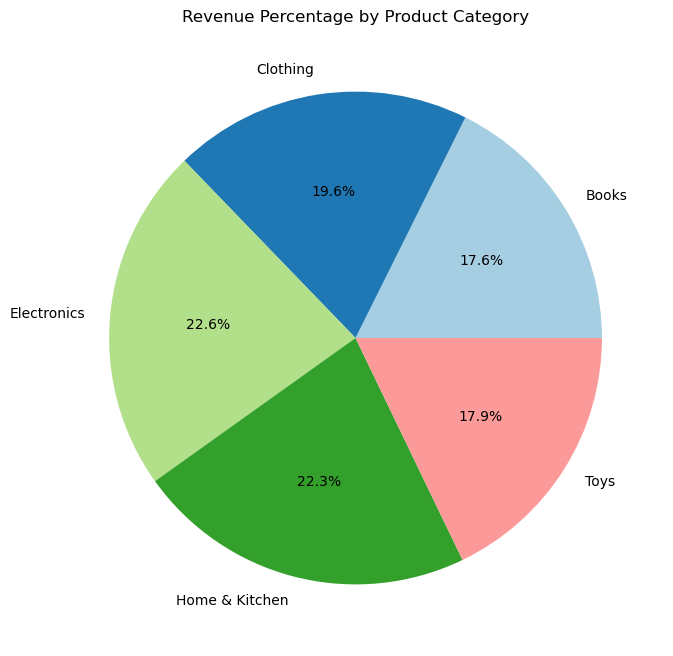

In [ ]:
category_revenue = (
    order_data
    .merge(product_data[['product_id', 'category']], on='product_id')  
    .groupby('category')['total_price']
    .sum()
)
total_revenue = category_revenue.sum()
category_revenue_percentage = (category_revenue / total_revenue) * 100
plt.figure(figsize=(10, 8))
plt.pie(category_revenue_percentage, labels=category_revenue_percentage.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(category_revenue_percentage))))
plt.title('Revenue Percentage by Product Category')
plt.show()

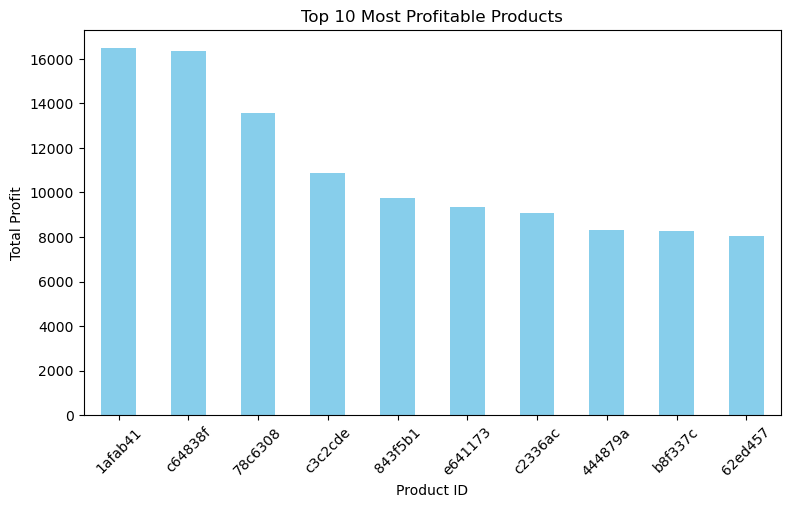

In [ ]:
product_profit = (
    order_data
    .groupby('product_id')['total_price']
    .sum()
)
top_products = product_profit.sort_values(ascending=False).head(10)
plt.figure(figsize=(9,5))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product ID')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

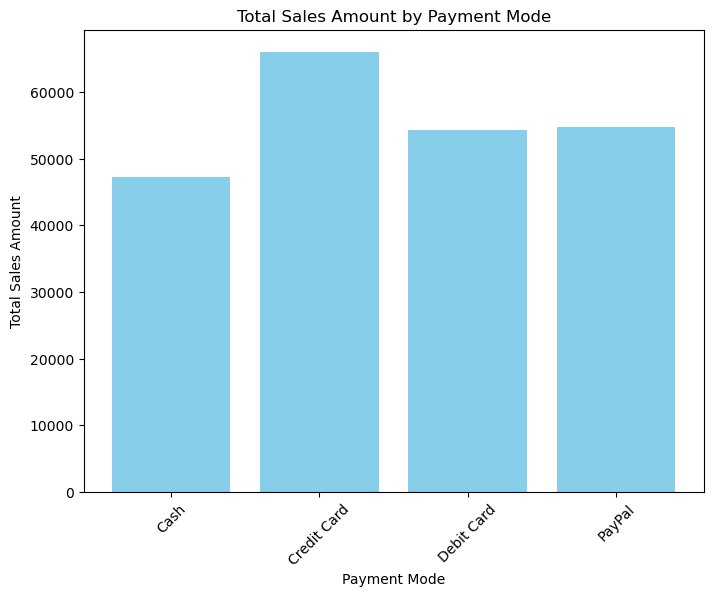

In [ ]:
payment_mode_sales = (
    order_data
    .groupby('payment_mode')['total_price']
    .sum()
)
plt.figure(figsize=(8,6))
plt.bar(payment_mode_sales.index, payment_mode_sales, color='skyblue')
plt.title('Total Sales Amount by Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

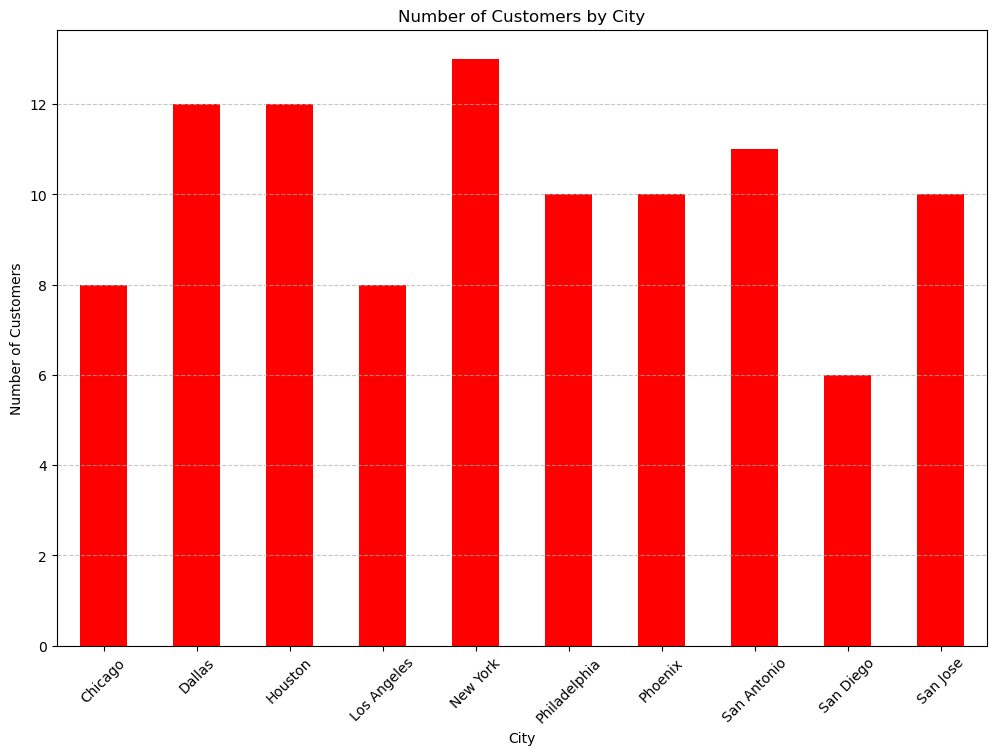

In [ ]:
city_wise_customers = customer_data.groupby('city')['customer_id'].count()
plt.figure(figsize=(12, 8))
city_wise_customers.plot(kind='bar', color='red')
plt.title('Number of Customers by City')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

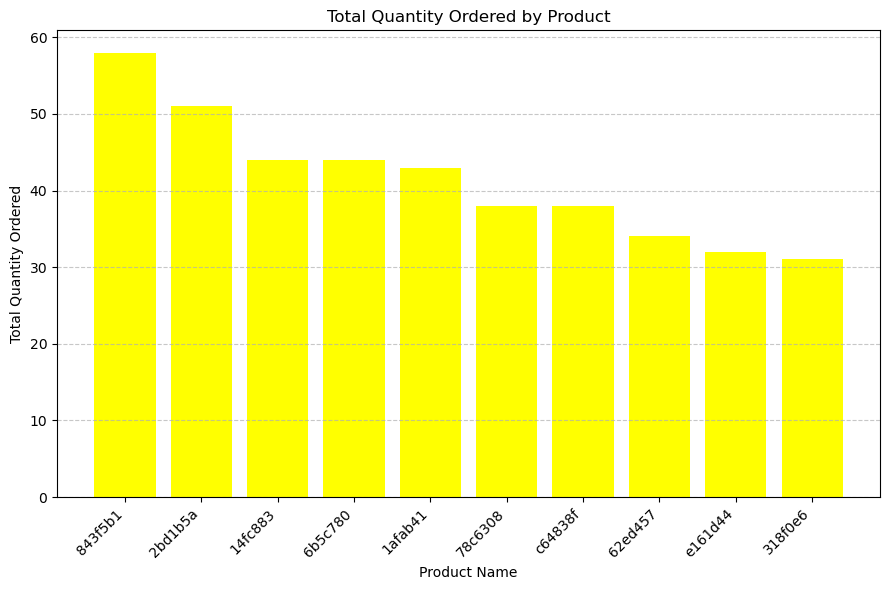

In [ ]:
total_quantity_per_product = order_data.groupby('product_id')['quantity'].sum().reset_index()
total_quantity_per_product = total_quantity_per_product.sort_values(by='quantity', ascending=False).head(10)
plt.figure(figsize=(9,6))
plt.bar(total_quantity_per_product['product_id'], total_quantity_per_product['quantity'], color='yellow')
plt.title('Total Quantity Ordered by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()


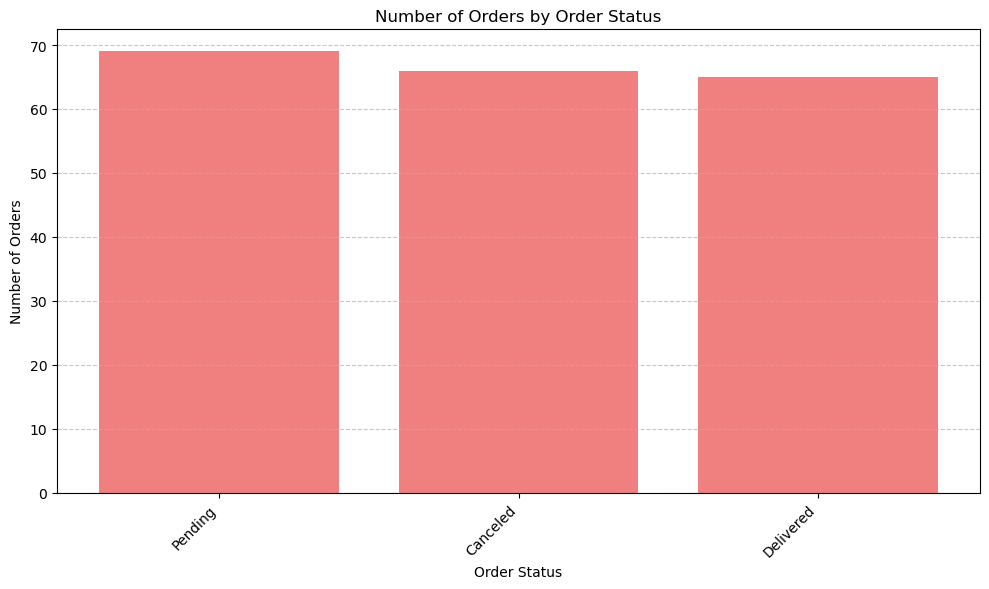

In [ ]:
orders_by_status = order_data['order_status'].value_counts().reset_index()
orders_by_status.columns = ['order_status', 'number_of_orders']
plt.figure(figsize=(10, 6))
plt.bar(orders_by_status['order_status'], orders_by_status['number_of_orders'], color='lightcoral')
plt.title('Number of Orders by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()